In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [12]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

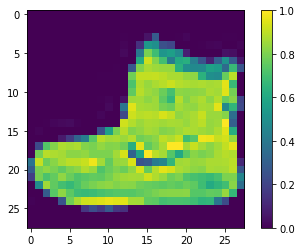

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

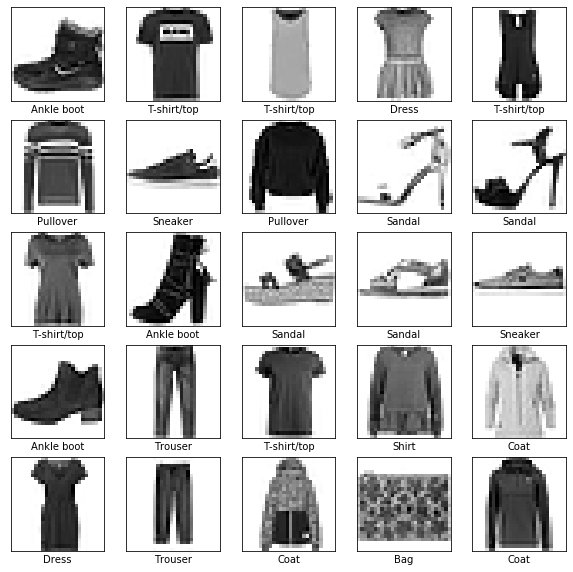

In [15]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 224us/sample - loss: 0.4957 - accuracy: 0.8272
Epoch 2/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.3780 - accuracy: 0.8637
Epoch 3/10
60000/60000 [==============================] - 16s 263us/sample - loss: 0.3372 - accuracy: 0.8769
Epoch 4/10
60000/60000 [==============================] - 15s 251us/sample - loss: 0.3122 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 14s 228us/sample - loss: 0.2932 - accuracy: 0.8921
Epoch 6/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.2794 - accuracy: 0.8968
Epoch 7/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.2661 - accuracy: 0.9014
Epoch 8/10
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2542 - accuracy: 0.9051
Epoch 9/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.2475 - accuracy: 0.9

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 1s - loss: 0.3291 - accuracy: 0.8830


In [21]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

In [23]:
predictions[0]

array([1.05181825e-05, 2.91350783e-08, 1.12699990e-06, 8.34058711e-10,
       6.23025755e-07, 6.73667155e-03, 6.87091642e-06, 4.14972985e-03,
       2.55006080e-06, 9.89091873e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0], class_names[9]

(9, 'Ankle boot')

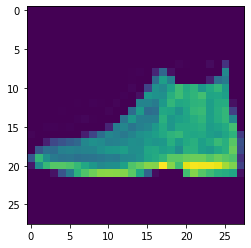

In [34]:
plt.figure()
plt.imshow(test_images[0])
plt.grid(False)

In [48]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label],
                                          color=color))

In [53]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

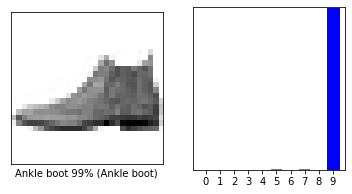

In [61]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

0:T-shirt/top
1:Trouser
2:Pullover
3:Dress
4:Coat
5:Sandal
6:Shirt
7:Sneaker
8:Bag
9:Ankle boot


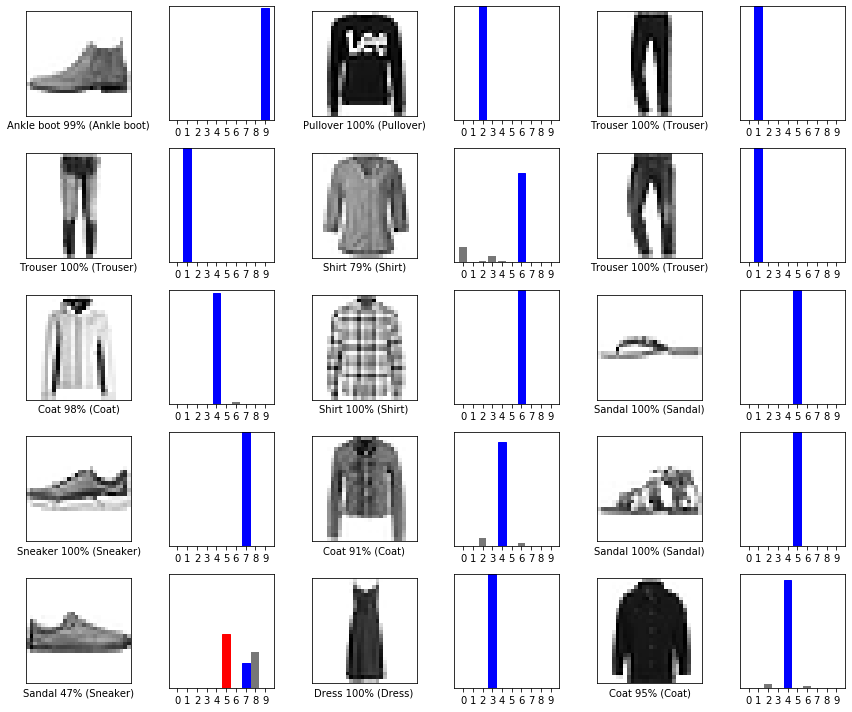

In [69]:
for i in range(10):
    print(f"{i}:{class_names[i]}")

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [72]:
img = (np.expand_dims(test_images[1], 0))
print(img.shape)

(1, 28, 28)


In [74]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.7014841e-05 3.9725168e-12 9.9936694e-01 4.4838499e-12 5.5295008e-04
  3.7016028e-14 5.2961390e-05 2.1572043e-17 1.0073051e-07 4.4881438e-13]]


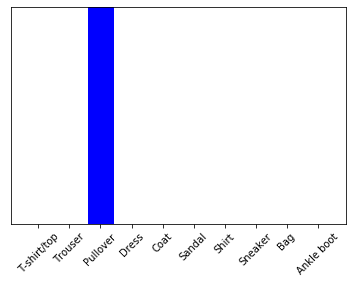

In [77]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [80]:
np.argmax(predictions_single[0])

2